In [2]:
import glob
import time
print("Running on ", time.asctime())

import numpy             as np
import tables            as tb
import json
from typing import Sequence

from invisible_cities.io.pmaps_io      import load_pmaps
from invisible_cities.evm.histos import HistoManager

from collections import defaultdict

from   invisible_cities.io.hist_io         import get_histograms_from_file

import invisible_cities.reco.histogram_functions as histf
import invisible_cities.icaro.histogram_plot_functions as histplotf
import invisible_cities.reco.monitor_functions   as monf
import invisible_cities.database.load_db         as dbf
import invisible_cities.io.dst_io as dstio

from invisible_cities.icaro.hst_functions  import shift_to_bin_centers
from invisible_cities.core .core_functions import weighted_mean_and_std
import matplotlib.pyplot as plt

import invisible_cities.core.fit_functions as fitf

from invisible_cities.core .core_functions import in_range
from icaro.core.fit_functions import fit_slices_1d_gauss
from icaro.core.fit_functions import expo_seed

Running on  Sun Jun 17 11:26:58 2018


In [23]:
%matplotlib inline

np.warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"]          = 8, 6
plt.rcParams["font.size"]               = 15
plt.rcParams["figure.max_open_warning"] = 100

profOpt = "--k"
fitOpt  = "r"

In [4]:
in_path = glob.glob("/Users/ansimez/Documents/InvCit/hdf5/Run4/5863/pmaps*h5")
pmaps = load_pmaps(in_path[0])

KeyError: 0

In [18]:
pmaps

{1: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 1
 Number of S2s: 1, 2: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 0
 Number of S2s: 1, 3: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 3
 Number of S2s: 2, 4: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 3
 Number of S2s: 1, 5: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 2
 Number of S2s: 1, 6: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 1
 Number of S2s: 1, 7: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 5
 Number of S2s: 1, 8: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 1
 Number of S2s: 1, 9: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 1
 Number of S2s: 1, 10: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s:

In [12]:
np.argmax(pmaps[1].s2s[0].sipms.sum_over_sensors)

7

In [15]:
in_path[:10]

['/Users/ansimez/Documents/InvCit/hdf5/Run4/5863/pmaps_0000_5863_v0.9.7_20180615v3_kr1300.h5',
 '/Users/ansimez/Documents/InvCit/hdf5/Run4/5863/pmaps_0001_5863_v0.9.7_20180615v3_kr1300.h5',
 '/Users/ansimez/Documents/InvCit/hdf5/Run4/5863/pmaps_0002_5863_v0.9.7_20180615v3_kr1300.h5',
 '/Users/ansimez/Documents/InvCit/hdf5/Run4/5863/pmaps_0003_5863_v0.9.7_20180615v3_kr1300.h5',
 '/Users/ansimez/Documents/InvCit/hdf5/Run4/5863/pmaps_0004_5863_v0.9.7_20180615v3_kr1300.h5',
 '/Users/ansimez/Documents/InvCit/hdf5/Run4/5863/pmaps_0005_5863_v0.9.7_20180615v3_kr1300.h5',
 '/Users/ansimez/Documents/InvCit/hdf5/Run4/5863/pmaps_0006_5863_v0.9.7_20180615v3_kr1300.h5',
 '/Users/ansimez/Documents/InvCit/hdf5/Run4/5863/pmaps_0007_5863_v0.9.7_20180615v3_kr1300.h5',
 '/Users/ansimez/Documents/InvCit/hdf5/Run4/5863/pmaps_0008_5863_v0.9.7_20180615v3_kr1300.h5',
 '/Users/ansimez/Documents/InvCit/hdf5/Run4/5863/pmaps_0009_5863_v0.9.7_20180615v3_kr1300.h5']

In [30]:
in_path = glob.glob("/Users/ansimez/Documents/InvCit/hdf5/Run4/5863/pmaps*h5")

diff5863 = []

for in_file in in_path[:10]:
    pmaps = load_pmaps(in_file)
    for pmap in pmaps.values():
        for s2 in pmap.s2s:
            pmts  = s2.pmts .sum_over_sensors
            sipms = s2.sipms.sum_over_sensors
            max_pmt  = np.argmax(pmts)
            try:
                max_sipm = np.argmax(sipms)
                diff5863.append(max_pmt - max_sipm)
            except:
                print(f'Size of PMTs ({len(pmts)}) and SiPMs ({len(sipms)}) is not the same.')

Size of PMTs (5) and SiPMs (0) is not the same.
Size of PMTs (4) and SiPMs (0) is not the same.
Size of PMTs (3) and SiPMs (0) is not the same.


In [31]:
in_path = glob.glob("/Users/ansimez/Documents/InvCit/hdf5/Run4/5812/pmaps*h5")

diff5812 = []

for in_file in in_path[:10]:
    pmaps = load_pmaps(in_file)
    for pmap in pmaps.values():
        for s2 in pmap.s2s:
            pmts  = s2.pmts .sum_over_sensors
            sipms = s2.sipms.sum_over_sensors
            max_pmt  = np.argmax(pmts)
            try:
                max_sipm = np.argmax(sipms)
                diff5812.append(max_pmt - max_sipm)
            except:
                print(f'Size of PMTs ({len(pmts)}) and SiPMs ({len(sipms)}) is not the same.')

Size of PMTs (3) and SiPMs (0) is not the same.
Size of PMTs (3) and SiPMs (0) is not the same.
Size of PMTs (7) and SiPMs (0) is not the same.
Size of PMTs (5) and SiPMs (0) is not the same.
Size of PMTs (3) and SiPMs (0) is not the same.


In [39]:
in_path = glob.glob("/Users/ansimez/Documents/InvCit/hdf5/Run4/5784/pmaps*h5")

diff5784 = []

for in_file in in_path[:10]:
    pmaps = load_pmaps(in_file)
    for pmap in pmaps.values():
        for s2 in pmap.s2s:
            pmts  = s2.pmts .sum_over_sensors
            sipms = s2.sipms.sum_over_sensors
            max_pmt  = np.argmax(pmts)
            try:
                max_sipm = np.argmax(sipms)
                diff5784.append(max_pmt - max_sipm)
            except:
                print(f'Size of PMTs ({len(pmts)}) and SiPMs ({len(sipms)}) is not the same.')

Size of PMTs (4) and SiPMs (0) is not the same.
Size of PMTs (4) and SiPMs (0) is not the same.
Size of PMTs (4) and SiPMs (0) is not the same.


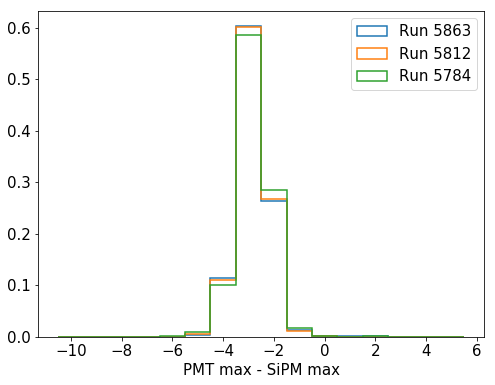

In [43]:
plt.hist(diff5863, 16, [-10.5, 5.5], histtype  = 'step', linewidth = 1.5, normed=True, label='Run 5863');
plt.hist(diff5812, 16, [-10.5, 5.5], histtype  = 'step', linewidth = 1.5, normed=True, label='Run 5812');
plt.hist(diff5784, 16, [-10.5, 5.5], histtype  = 'step', linewidth = 1.5, normed=True, label='Run 5784');

plt.xlabel("PMT max - SiPM max")

plt.legend()

plt.savefig('/Users/ansimez/Documents/TimeDifference.pdf')

In [153]:
diff     = {}
pmt_max  = {}
pmt_sipm  = {}
sipm_pmt = {} 
sipm_max = {} 
sipm_max_less = {}
sipm_max_more = {}
pmt_max_less = {}
pmt_max_more = {}

In [191]:
run_number = 5879 #0 delay
in_path = glob.glob(f"/Users/ansimez/Documents/InvCit/hdf5/Run4/{run_number}/pmaps*h5")

diff         [run_number] = []
pmt_max      [run_number] = []
pmt_sipm    [run_number] = []
sipm_max     [run_number] = []
sipm_pmt     [run_number] = []
sipm_max_less[run_number] = []
sipm_max_more[run_number] = []
pmt_max_less[run_number] = []
pmt_max_more[run_number] = []

for in_file in in_path[:10]:
    pmaps = load_pmaps(in_file)
    for pmap in pmaps.values():
        for s2 in pmap.s2s:
            pmts  = s2.pmts .sum_over_sensors
            sipms = s2.sipms.sum_over_sensors
            max_pmt  = np.argmax(pmts)
            try:
                max_sipm = np.argmax(sipms)
                pmt_max[run_number].append(pmts[max_pmt])
                pmt_sipm[run_number].append(pmts[max_sipm])
                sipm_pmt[run_number].append(sipms[max_pmt])
                sipm_max[run_number].append(sipms[max_sipm])
                sipm_max_less[run_number].append(sipms[max_sipm-1])
                sipm_max_more[run_number].append(sipms[max_sipm+1])
                pmt_max_less[run_number].append(pmts[max_sipm-1])
                pmt_max_more[run_number].append(pmts[max_sipm+1])                
                diff   [run_number].append(max_pmt - max_sipm)

            except:
                print(f'Size of PMTs ({len(pmts)}) and SiPMs ({len(sipms)}) is not the same.')

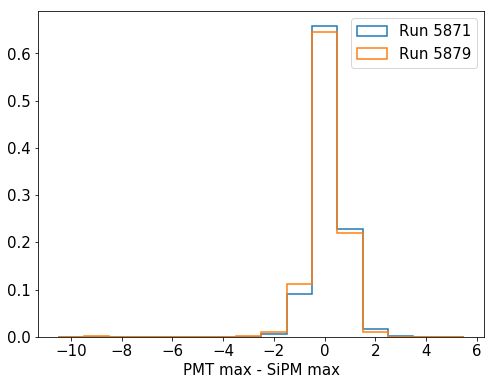

In [192]:
for run, values in diff.items():
    plt.hist(values, 16, [-10.5, 5.5], histtype  = 'step', linewidth = 1.5, normed=True, label=f'Run {run}');

plt.xlabel("PMT max - SiPM max")
plt.legend()
plt.savefig('/Users/ansimez/Documents/TimeDifference.pdf')

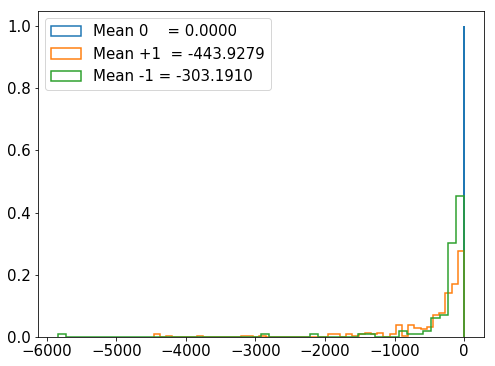

In [158]:
d     = np.array(diff[5871])
pmt   = np.array(pmt_max[5871])
sipm  = np.array(sipm_max[5871])
sipm1 = np.array(sipm_max_more[5871])
sipm_1 = np.array(sipm_max_less[5871])

e = np.array(pmt_sipm[5871]) - np.array(pmt_max[5871])

plt.hist(e[d==0] , 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==0])] * len(e[d==0]), label=f'Mean 0    = {e[d==0].mean():.4f}');
plt.hist(e[d==1] , 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==1])] * len(e[d==1]), label=f'Mean +1  = {e[d==1].mean():.4f}');
plt.hist(e[d==-1], 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==-1])] * len(e[d==-1]), label=f'Mean -1 = {e[d==-1].mean():.4f}');

plt.legend()

11.180339887498949

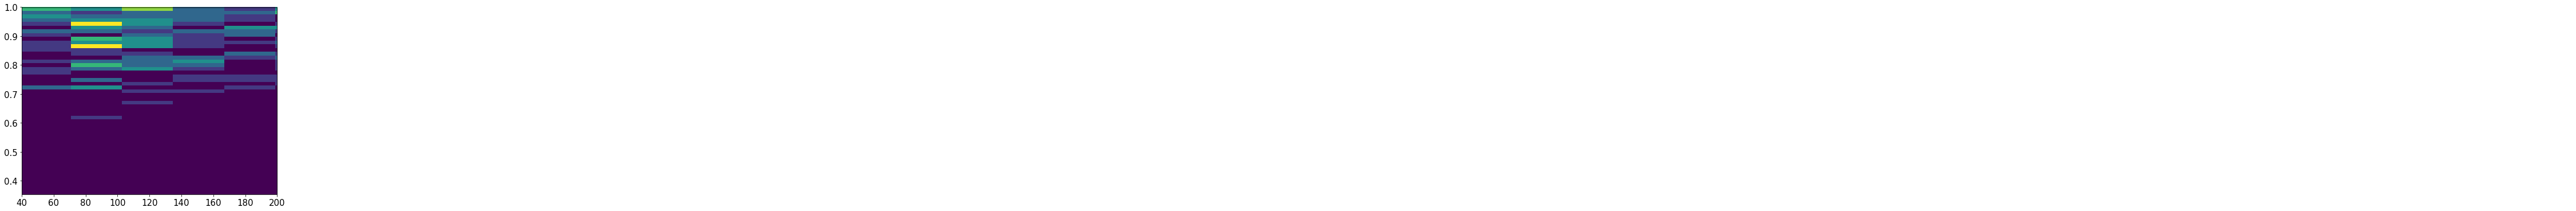

In [170]:
d     = np.array(diff[5871])
pmt   = np.array(pmt_max[5871])
sipm  = np.array(sipm_max[5871])
sipm1 = np.array(sipm_max_more[5871])
sipm_1 = np.array(sipm_max_less[5871])

e = np.array(sipm_pmt[5871])/np.array(sipm_max[5871])

#plt.hist(e[d==0] , 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==0])] * len(e[d==0]), label=f'Mean 0    = {e[d==0].mean():.4f}');
plt.hist2d(np.array(sipm_max[5871])[d==1], e[d==1], 50, weights=[1/len(e[d==1])] * len(e[d==1]), label=f'Mean +1  = {e[d==1].mean():.4f}');
#plt.hist(e[d==1],  50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==1])] * len(e[d==1]), label=f'Mean +1  = {e[d==1].mean():.4f}');
#plt.hist(e[d==-1], 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==-1])] * len(e[d==-1]), label=f'Mean -1 = {e[d==-1].mean():.4f}');
#plt.legend()
plt.xlim(40., 200)

np.sqrt(80)/80*100

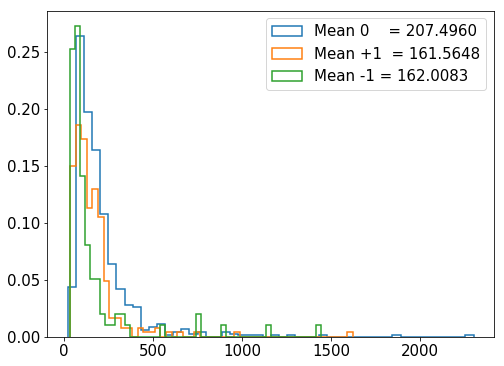

In [142]:
d     = np.array(diff[5871])
pmt   = np.array(pmt_max[5871])
sipm  = np.array(sipm_max[5871])
sipmt  = np.array(sipm_pmt[5871])
sipm1 = np.array(sipm_max_more[5871])
sipm_1 = np.array(sipm_max_less[5871])

e = sipmt - sipm

plt.hist(e[d==0] , 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==0])] * len(e[d==0]), label=f'Mean 0    = {e[d==0].mean():.4f}');
plt.hist(e[d==1] , 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==1])] * len(e[d==1]), label=f'Mean +1  = {e[d==1].mean():.4f}');
plt.hist(e[d==-1], 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==-1])] * len(e[d==-1]), label=f'Mean -1 = {e[d==-1].mean():.4f}');

plt.legend()

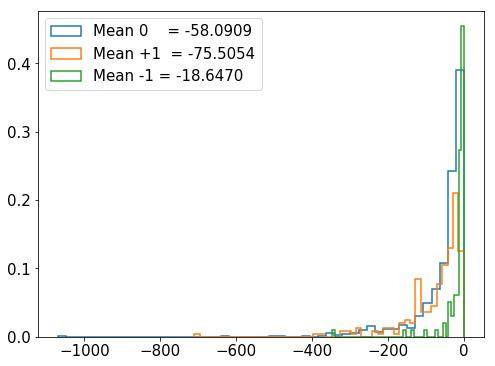

In [173]:
d     = np.array(diff[5871])
pmt   = np.array(pmt_max[5871])
sipm  = np.array(sipm_max[5871])
sipm1 = np.array(sipm_max_more[5871])
sipm_1 = np.array(sipm_max_less[5871])

e = sipm_1 - sipm

plt.hist(e[d==0] , 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==0])] * len(e[d==0]), label=f'Mean 0    = {e[d==0].mean():.4f}');
plt.hist(e[d==1] , 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==1])] * len(e[d==1]), label=f'Mean +1  = {e[d==1].mean():.4f}');
plt.hist(e[d==-1], 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==-1])] * len(e[d==-1]), label=f'Mean -1 = {e[d==-1].mean():.4f}');

plt.legend()

In [ ]:
plt.hist(sipm)

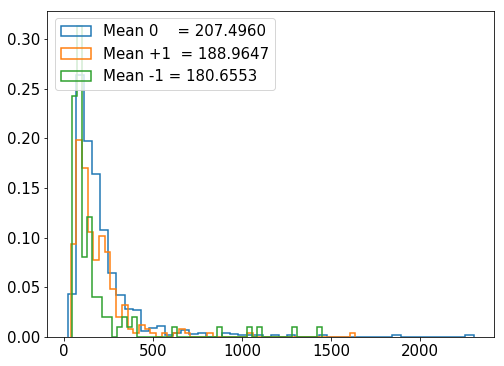

In [178]:
d     = np.array(diff[5871])
pmt   = np.array(pmt_max[5871])
sipm  = np.array(sipm_max[5871])
sipm1 = np.array(sipm_max_more[5871])
sipm_1 = np.array(sipm_max_less[5871])

e = sipm

plt.hist(e[d==0] , 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==0])] * len(e[d==0]), label=f'Mean 0    = {e[d==0].mean():.4f}');
plt.hist(e[d==1], 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==1])] * len(e[d==1]), label=f'Mean +1  = {e[d==1].mean():.4f}');
plt.hist(e[d==-1], 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==-1])] * len(e[d==-1]), label=f'Mean -1 = {e[d==-1].mean():.4f}');

plt.legend(loc='upper left')

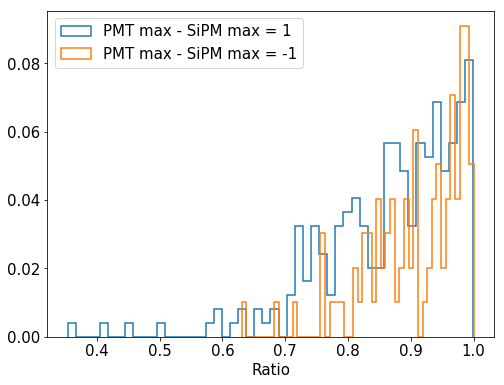

In [190]:
d     = np.array(diff[5871])
pmt   = np.array(pmt_max[5871])
sipm  = np.array(sipm_max[5871])
sipm1 = np.array(sipm_max_more[5871])
sipm_1 = np.array(sipm_max_less[5871])

e = sipmt/sipm

#plt.hist(e[d==0] , 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==0])] * len(e[d==0]), label=f'Mean 0    = {e[d==0].mean():.4f}');
plt.hist(e[d==1], 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==1])] * len(e[d==1]), label=f'PMT max - SiPM max = 1');
plt.hist(e[d==-1], 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==-1])] * len(e[d==-1]), label=f'PMT max - SiPM max = -1');

plt.xlabel('Ratio')

plt.savefig('/Users/ansimez/Documents/Ratio.pdf')
plt.legend(loc='upper left')

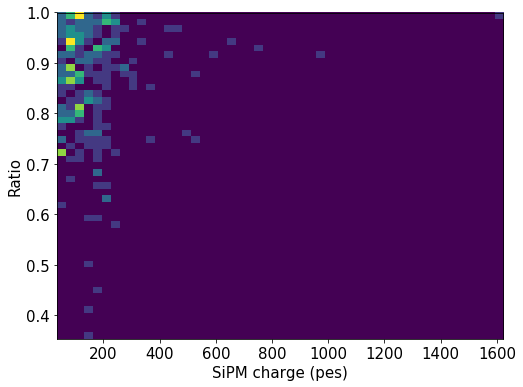

In [189]:
d     = np.array(diff[5871])
pmt   = np.array(pmt_max[5871])
sipm  = np.array(sipm_max[5871])
sipm1 = np.array(sipm_max_more[5871])
sipm_1 = np.array(sipm_max_less[5871])

e = sipmt/sipm

#plt.hist(e[d==0] , 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==0])] * len(e[d==0]), label=f'Mean 0    = {e[d==0].mean():.4f}');
plt.hist2d(sipmt[d==1], e[d==1], 50, weights=[1/len(e[d==1])] * len(e[d==1]), label=f'PMT max - SiPM max = 1');
#plt.hist(e[d==-1], 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==-1])] * len(e[d==-1]), label=f'PMT max - SiPM max = -1');

plt.ylabel('Ratio')
plt.xlabel('SiPM charge (pes)')

plt.savefig('/Users/ansimez/Documents/Ratio2D.pdf')
plt.legend(loc='upper left')

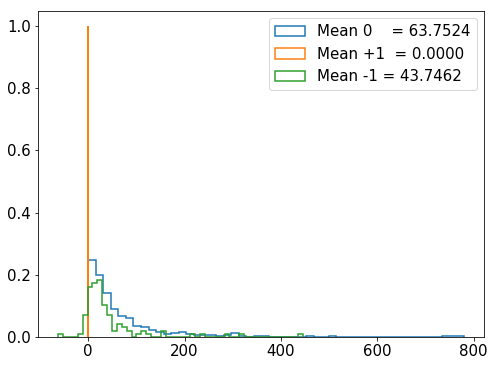

In [174]:
d     = np.array(diff[5871])
pmt   = np.array(pmt_max[5871])
sipm  = np.array(sipm_max[5871])
sipm1 = np.array(sipm_max_more[5871])
sipm_1 = np.array(sipm_max_less[5871])

e = np.array(sipm_pmt[5871]) - np.array(sipm_max_more[5871])

plt.hist(e[d==0] , 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==0])] * len(e[d==0]), label=f'Mean 0    = {e[d==0].mean():.4f}');
plt.hist(e[d==1] , 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==1])] * len(e[d==1]), label=f'Mean +1  = {e[d==1].mean():.4f}');
plt.hist(e[d==-1], 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==-1])] * len(e[d==-1]), label=f'Mean -1 = {e[d==-1].mean():.4f}');

plt.legend()

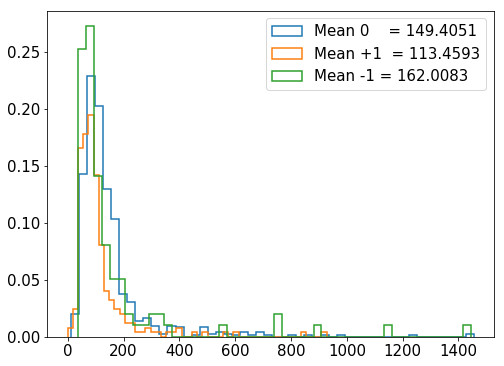

In [132]:
d     = np.array(diff[5871])
pmt   = np.array(pmt_max[5871])
sipm  = np.array(sipm_max[5871])
sipm1 = np.array(sipm_max_more[5871])
sipm_1 = np.array(sipm_max_less[5871])

e = sipm_1

plt.hist(e[d==0] , 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==0])] * len(e[d==0]), label=f'Mean 0    = {e[d==0].mean():.4f}');
plt.hist(e[d==1] , 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==1])] * len(e[d==1]), label=f'Mean +1  = {e[d==1].mean():.4f}');
plt.hist(e[d==-1], 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==-1])] * len(e[d==-1]), label=f'Mean -1 = {e[d==-1].mean():.4f}');

plt.legend()

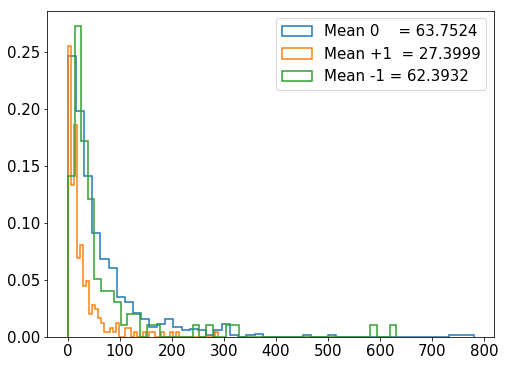

In [135]:
d     = np.array(diff[5871])
pmt   = np.array(pmt_max[5871])
sipm  = np.array(sipm_max[5871])
sipm1 = np.array(sipm_max_more[5871])
sipm_1 = np.array(sipm_max_less[5871])

e = sipm - sipm1

plt.hist(e[d==0] , 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==0])] * len(e[d==0]), label=f'Mean 0    = {e[d==0].mean():.4f}');
plt.hist(e[d==1] , 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==1])] * len(e[d==1]), label=f'Mean +1  = {e[d==1].mean():.4f}');
plt.hist(e[d==-1], 50, histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==-1])] * len(e[d==-1]), label=f'Mean -1 = {e[d==-1].mean():.4f}');

plt.legend()

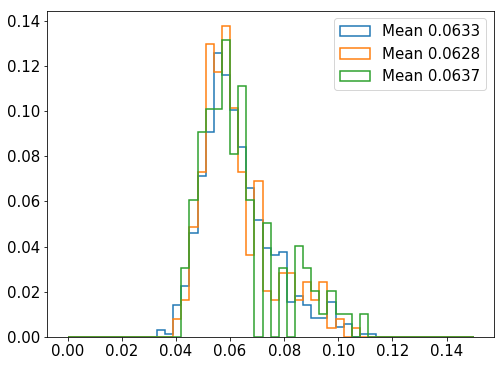

In [114]:
d   = np.array(diff[5871])
e0  = np.array(e_ratio[5871])
e1  = np.array(e_ratio_1more[5871])
e_1 = np.array(e_ratio_1less[5871])

plt.hist(e0[d==0] , 50, [0., 0.15], histtype  = 'step', linewidth = 1.5, weights=[1/len(e0[d==0])] * len(e0[d==0]), label=f'Mean {e0[d==0].mean():.4f}');
plt.hist(e0[d==1] , 50, [0., 0.15], histtype  = 'step', linewidth = 1.5, weights=[1/len(e0[d==1])] * len(e0[d==1]), label=f'Mean {e0[d==1].mean():.4f}');
plt.hist(e0[d==-1], 50, [0., 0.15], histtype  = 'step', linewidth = 1.5, weights=[1/len(e0[d==-1])] * len(e0[d==-1]), label=f'Mean {e0[d==-1].mean():.4f}');

plt.legend()

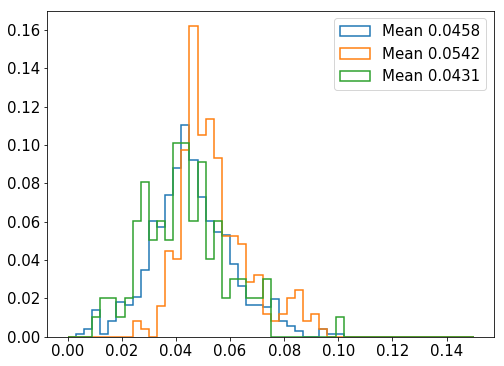

In [115]:
d   = np.array(diff[5871])
e0  = np.array(e_ratio[5871])
e1  = np.array(e_ratio_1more[5871])
e_1 = np.array(e_ratio_1less[5871])

e = e1

plt.hist(e[d==0] , 50, [0., 0.15], histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==0])] * len(e[d==0]), label=f'Mean {e[d==0].mean():.4f}');
plt.hist(e[d==1] , 50, [0., 0.15], histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==1])] * len(e[d==1]), label=f'Mean {e[d==1].mean():.4f}');
plt.hist(e[d==-1], 50, [0., 0.15], histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==-1])] * len(e[d==-1]), label=f'Mean {e[d==-1].mean():.4f}');

plt.legend()

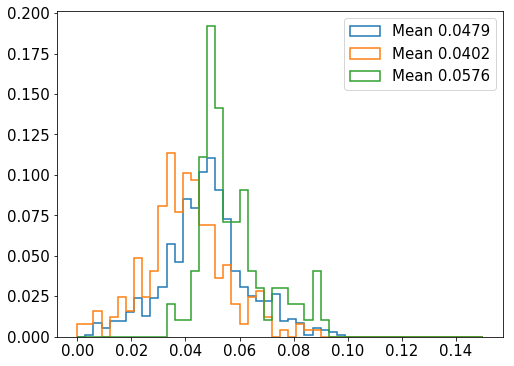

In [117]:
d   = np.array(diff[5871])
e0  = np.array(e_ratio[5871])
e1  = np.array(e_ratio_1more[5871])
e_1 = np.array(e_ratio_1less[5871])

e = e_1

plt.hist(e[d==0] , 50, [0., 0.15], histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==0])] * len(e[d==0]), label=f'Mean {e[d==0].mean():.4f}');
plt.hist(e[d==1] , 50, [0., 0.15], histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==1])] * len(e[d==1]), label=f'Mean {e[d==1].mean():.4f}');
plt.hist(e[d==-1], 50, [0., 0.15], histtype  = 'step', linewidth = 1.5, weights=[1/len(e[d==-1])] * len(e[d==-1]), label=f'Mean {e[d==-1].mean():.4f}');

plt.legend()

0  = 0.06331344693899155
-1  = 0.04020169749855995


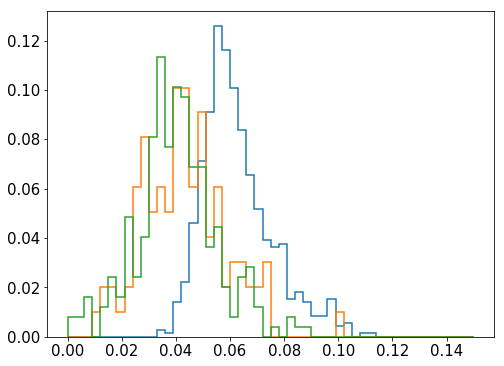

In [107]:
d   = np.array(diff[5871])
e0  = np.array(e_ratio[5871])
e1  = np.array(e_ratio_1more[5871])
e_1 = np.array(e_ratio_1less[5871])

plt.hist(e0[d==0] , 50, [0., 0.15], histtype  = 'step', linewidth = 1.5, weights=[1/len(e0[d==0])] * len(e0[d==0]), label=f'Run {run}');
plt.hist(e1[d==-1] , 50, [0., 0.15], histtype  = 'step', linewidth = 1.5, weights=[1/len(e1[d==-1])] * len(e1[d==-1]), label=f'Run {run}');
plt.hist(e_1[d==1], 50, [0., 0.15], histtype  = 'step', linewidth = 1.5, weights=[1/len(e_1[d==1])] * len(e_1[d==1]), label=f'Run {run}');


print(f'0  = {e0[d==0].mean()}')
print(f'-1  = {e_1[d==1].mean()}')

0  = 0.06331344693899155
-1  = 0.057551924139261246


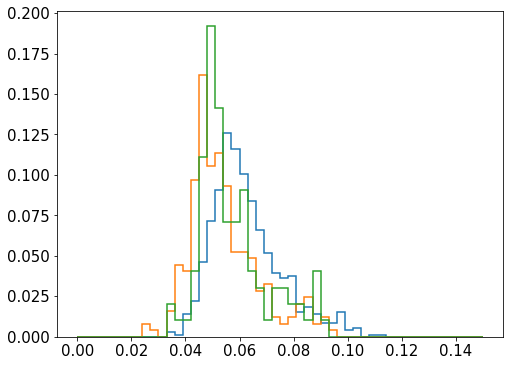

In [109]:
d   = np.array(diff[5871])
e0  = np.array(e_ratio[5871])
e1  = np.array(e_ratio_1more[5871])
e_1 = np.array(e_ratio_1less[5871])

plt.hist(e0[d==0] , 50, [0., 0.15], histtype  = 'step', linewidth = 1.5, weights=[1/len(e0[d==0])] * len(e0[d==0]), label=f'Run {run}');
plt.hist(e1[d==1] , 50, [0., 0.15], histtype  = 'step', linewidth = 1.5, weights=[1/len(e1[d==1])] * len(e1[d==1]), label=f'Run {run}');
plt.hist(e_1[d==-1], 50, [0., 0.15], histtype  = 'step', linewidth = 1.5, weights=[1/len(e_1[d==-1])] * len(e_1[d==-1]), label=f'Run {run}');

print(f'0  = {e0[d==0].mean()}')
print(f'-1  = {e_1[d==-1].mean()}')

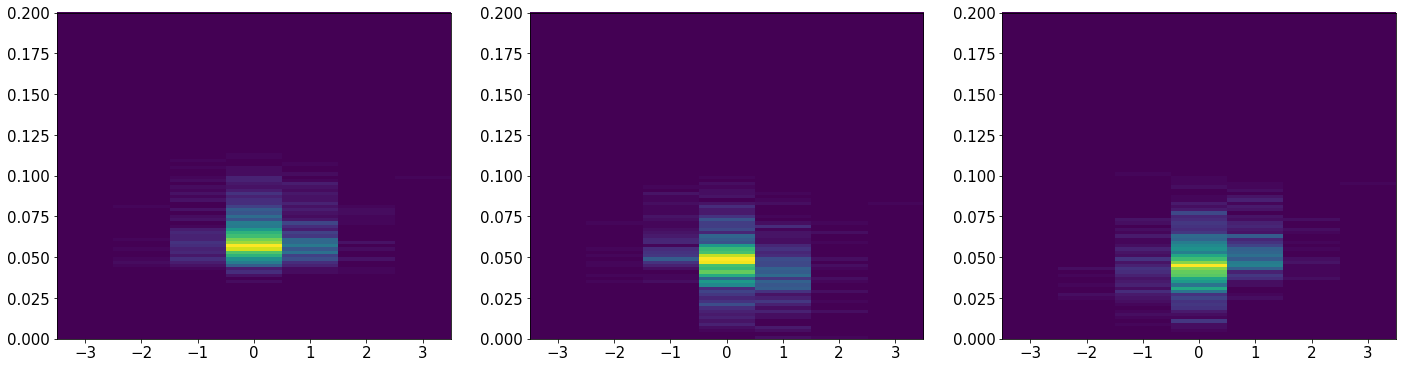

In [82]:
fig, ax = plt.subplots(1, 3, figsize=(24,6))

ax[0].hist2d(diff[5871], e_ratio[5871], [7, 100], [[-3.5, 3.5], [0., 0.2]]);
ax[1].hist2d(diff[5871], e_ratio_1less[5871], [7, 100], [[-3.5, 3.5], [0., 0.2]]);
ax[2].hist2d(diff[5871], e_ratio_1more[5871], [7, 100], [[-3.5, 3.5], [0., 0.2]]);

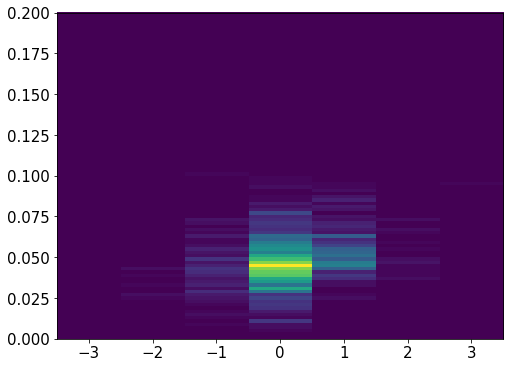

In [81]:
plt.hist2d(diff[5871], e_ratio_1more[5871], [7, 100], [[-3.5, 3.5], [0., 0.2]]);

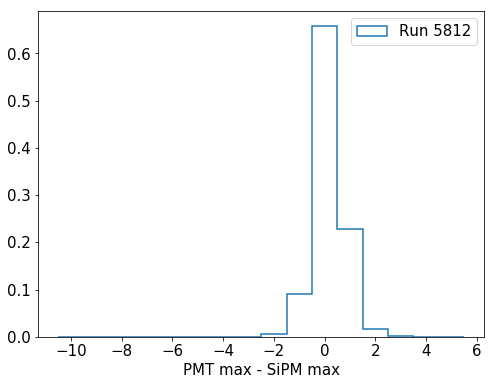

In [58]:

plt.hist(diff[5871], 16, [-10.5, 5.5], histtype  = 'step', linewidth = 1.5, normed=True, label=f'Run {run}');

plt.xlabel("PMT max - SiPM max")
plt.legend()
plt.savefig('/Users/ansimez/Documents/TimeDifference.pdf')